In [3]:
import pandas as pd
import numpy as np


In [2]:
s = pd.Series([1,2,3,4,5])

In [3]:
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [4]:
s.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

In [5]:
s = pd.Series(['A','B','A','C','B'])

In [6]:
s

0    A
1    B
2    A
3    C
4    B
dtype: object

In [7]:
s.describe()

count     5
unique    3
top       A
freq      2
dtype: object

In [9]:
s.value_counts()

A    2
B    2
C    1
dtype: int64

In [20]:
s.value_counts()['A']

2

In [17]:
s.values

array(['A', 'B', 'A', 'C', 'B'], dtype=object)

In [37]:
s=pd.Series([0,1,np.nan],index=["A","C","B"])

In [38]:
s

A    0.0
C    1.0
B    NaN
dtype: float64

In [39]:
~s.isnull()

A     True
C     True
B    False
dtype: bool

In [40]:
ss=pd.Series({"A":1,"B":2,"C":3})

In [41]:
ss, s

(A    1
 B    2
 C    3
 dtype: int64, A    0.0
 C    1.0
 B    NaN
 dtype: float64)

In [49]:
s.isnull()

A    False
C    False
B     True
dtype: bool

In [50]:
data={'clientes':[3,8,2],'tienda':['a','b','c'],'facturacion':[100,200,300]}

In [51]:
data

{'clientes': [3, 8, 2],
 'tienda': ['a', 'b', 'c'],
 'facturacion': [100, 200, 300]}

In [52]:
df = pd.DataFrame(data)
df

,clientes,tienda,facturacion
0,3,a,100
1,8,b,200
2,2,c,300


In [53]:
df["visitas"]=np.array([100,200,50])

In [55]:
df["pasta_cliente"]=df["facturacion"]/df["clientes"]

In [56]:
df

,clientes,tienda,facturacion,visitas,pasta_cliente
0,3,a,100,100,33.333333
1,8,b,200,200,25.000000
2,2,c,300,50,150.000000


In [57]:
df["visitas"]/df["clientes"]

0    33.333333
1    25.000000
2    25.000000
dtype: float64

In [64]:
df.set_index("tienda")

,clientes,facturacion,visitas,pasta_cliente
tienda,,,,
a,3,100,100,33.333333
b,8,200,200,25.000000
c,2,300,50,150.000000


In [4]:
df1 = pd.DataFrame(np.arange(12.).reshape(3,4),columns=["a","b","c","d"])
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [69]:
df1.loc[1,'b']=np.nan

In [70]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,NaN,6.0,7.0
2,8.0,9.0,10.0,11.0


In [88]:
def sumabien(x):
    if x.isnull().any(): 
        return np.nan
    return np.sum(x)
df1.apply(sumabien)

a    12.0
b     NaN
c    18.0
d    21.0
dtype: float64

In [21]:
def maxmin(x):    
    return pd.Series([np.max(x),np.min(x)],index =["max","min"])

df1.apply(maxmin)

,a,b,c,d
max,8.0,9.0,10.0,11.0
min,0.0,1.0,2.0,3.0


In [22]:
def f(x):
    print(x)
    return x

df1.applymap(f)
    

0.0
4.0
8.0
0.0
4.0
8.0
1.0
5.0
9.0
2.0
6.0
10.0
3.0
7.0
11.0


,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [31]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib notebook

In [49]:
X,y=datasets.make_circles(factor=0.3,noise=0.08)

<IPython.core.display.Javascript object>


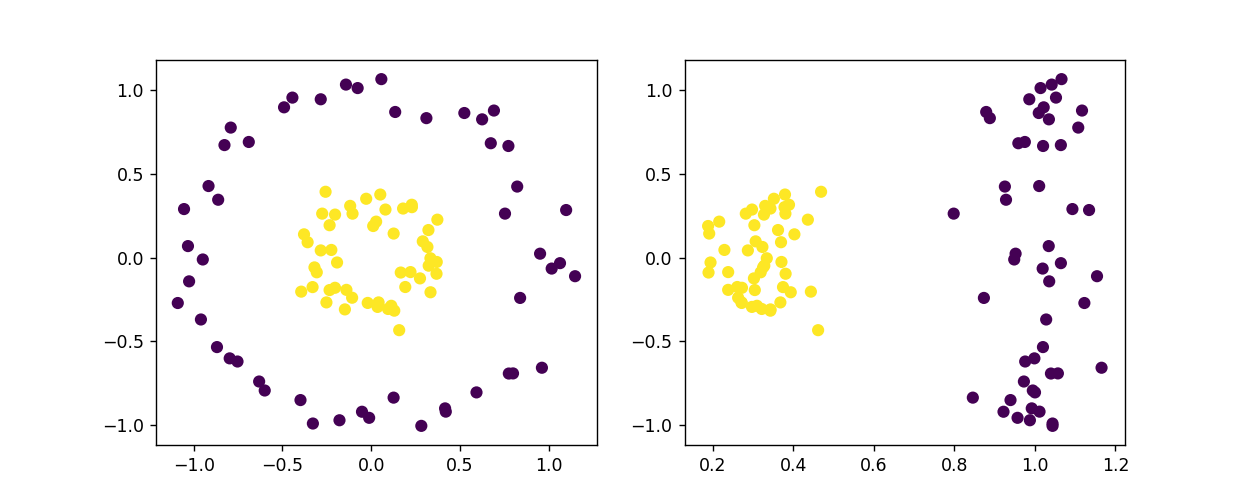

In [79]:
fig, ax=plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(X[:,0],X[:,1],c=y)
ax[1].scatter(df["ecu"],df["x1"],c=df["y"])
plt.show()

In [62]:
df = pd.DataFrame(np.hstack((X,y.reshape(-1,1))),columns = ["x0","x1","y"])

df.head(3)

,x0,x1,y
0,-0.791067,0.775356,0.0
1,0.962125,-0.657927,0.0
2,0.051417,0.375787,1.0


In [73]:
def euclidean_dist(x):    
    x0=x.loc["x0"]
    x1=x.loc["x1"]
    return np.sqrt((x0**2)+x1**2)
    

df["ecu"]=df.apply(euclidean_dist,axis=1)
    
df    

,x0,x1,y,ecu
0,-0.791067,0.775356,0.0,1.107684
1,0.962125,-0.657927,0.0,1.165570
2,0.051417,0.375787,1.0,0.379288
3,-0.076079,1.011204,0.0,1.014062
4,-0.490748,0.896305,0.0,1.021859
5,0.221673,-0.087065,1.0,0.238158
6,-0.192062,-0.029684,1.0,0.194342
7,-0.251966,-0.267996,1.0,0.367843
8,-1.054290,0.289102,0.0,1.093210
9,-0.443672,0.954301,0.0,1.052395


In [80]:
s = pd.Series(range(4),index=["d","a","b","c"])
s

d    0
a    1
b    2
c    3
dtype: int64

<IPython.core.display.Javascript object>


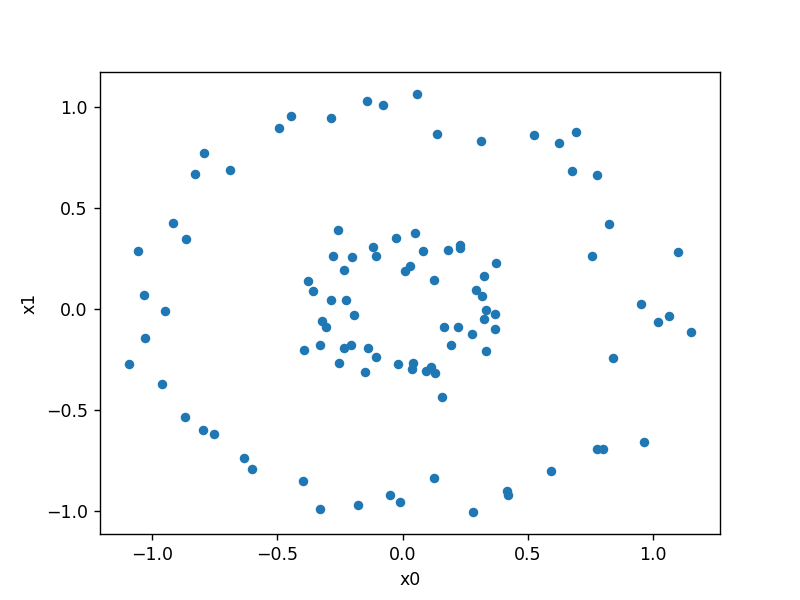

In [82]:
df.plot("x0","x1",kind='scatter',)

In [83]:
s=pd.Series([7,-4,7,4,2,0,4])
s

0    7
1   -4
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [85]:
s.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [86]:
!ls

cosas.csv  matplotlib.ipynb  Pandas.ipynb


In [90]:
pd.read_csv("cosas.csv",sep=",",header=0)

,plato,cantidad,precio
0,croquetas,12,1
1,tortilla,1,4
2,calamares,1,2
3,nachos,4,3
